In [1]:
import pandas as pd
import logging
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import os as os
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import os as os
import sys
import csv

csv.field_size_limit(sys.maxsize)
csv.field_size_limit(500 * 1024 * 1024)

9223372036854775807

In [2]:
data_2010_2017 = pd.read_csv("data_2010_2017_61717.csv",engine='python')

In [6]:
total_2010_2017 = pd.concat([data_2010_2017,data_2012],axis=0)

In [336]:
amazon2010_2017 = total_2010_2017[total_2010_2017["Name"].str.contains("amazon")]

In [338]:
total_2010_2017["Name"].value_counts()

broadvision inc                         8
american international group inc        8
cvg controlled inc                      8
clean energy fuels corp.                8
zions bancorporation /ut/               8
standard motor products inc             8
apparel retailers inc                   8
natural gas services group inc          8
exco resources inc                      8
goodyear tire & rubber co /oh/          8
york water co                           8
allied signal inc                       8
century bancorp inc                     8
dsp group inc /de/                      8
bon ton stores inc                      8
douglas emmett inc                      8
schwab charles corp                     8
avery dennison corp                     8
endurance specialty holdings ltd        8
eagle bancorp montana, inc.             8
chesapeake energy corp                  8
marine products corp                    8
dawson geophysical co                   8
adobe systems inc                 

In [340]:
altria_2010_2017 = total_2010_2017[total_2010_2017["Name"].str.contains("altria group inc")]

In [343]:
amazon_altria = pd.concat([amazon2010_2017, altria_2010_2017],axis=0).reset_index(drop=True)

In [346]:
amazon_altria.to_csv("amazon_altria.csv",index=False)

In [15]:
data_2010_2017.head(2)

,CIK #,Name,company,report,date,url,full_text,year,quarter,report_type,status
0,1000228,henry schein inc,HENRY SCHEIN INC,10-K,2017-02-21,https://www.sec.gov/Archives/edgar/data/100022...,\n10-K\n1\nthe10k_2016.htm\nTHE 2016 ANNUAL 10...,2017,1,10-K,winner
1,1001316,atlantic pharmaceuticals inc,"TG THERAPEUTICS, INC.",10-K,2017-03-16,https://www.sec.gov/Archives/edgar/data/100131...,\n10-K\n1\ntgtx_10k.htm\n10-K\n\n\n\n\n\nBluep...,2017,1,10-K,winner


In [4]:
data_2012 = pd.read_csv("data_file_61717.csv")

In [5]:
data_2012 = data_2012[["CIK #","Name","company","report","date","url","full_text","year","quarter","report_type","status"]]

In [19]:
Amazon_2012 = data_2012[data_2012["Name"].str.contains("amazon")].reset_index(drop = True)

In [13]:
Amazon = data_2010_2017[data_2010_2017["Name"].str.contains("amazon")].reset_index(drop = True)

In [22]:
amazon = pd.concat([Amazon_2012, Amazon],axis=0)

In [23]:
amazon.columns

Index([u'CIK #', u'Name', u'company', u'report', u'date', u'url', u'full_text',
       u'year', u'quarter', u'report_type', u'status'],
      dtype='object')

In [11]:
total_2010_2017.head(1)

,CIK #,Name,company,report,date,url,full_text,year,quarter,report_type,status
0,1000228,henry schein inc,HENRY SCHEIN INC,10-K,2017-02-21,https://www.sec.gov/Archives/edgar/data/100022...,\n10-K\n1\nthe10k_2016.htm\nTHE 2016 ANNUAL 10...,2017,1,10-K,winner


In [21]:
total_2010_2017.to_csv("final_data_2012_2017.csv",index = False)

In [22]:
# MyDocs reading from a data frame
class MyDocs(object):
    def __iter__(self):
        for i in range(total_2010_2017.shape[0]):
            yield TaggedDocument(words=gensim.utils.simple_preprocess(total_2010_2017.iloc[i,6]), tags=['%s' % total_2010_2017.iloc[i,1]])

In [23]:
assert gensim.models.doc2vec.FAST_VERSION > -1, "this will be painfully slow otherwise"

In [24]:
%%time

if not os.path.exists('models/doc2vec.model_new1'):
    print "start traing doc2vec model..."
    documents = MyDocs()
    doc2vec_model = Doc2Vec(dm=1, dbow_words=1, size=200, window=8, min_count=20, workers=1)
    doc2vec_model.build_vocab(documents)
    doc2vec_model.train(documents, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.iter)
    if not os.path.exists('models'):
        os.makedirs('models')
        doc2vec_model.save('models/doc2vec.model_new1')
    else:
        doc2vec_model.save('models/doc2vec.model_new1')
else:
    doc2vec_model = Doc2Vec.load('models/doc2vec.model_new1')

2017-06-19 19:08:25,914 : INFO : collecting all words and their counts
2017-06-19 19:08:26,101 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags


start traing doc2vec model...


2017-06-19 19:18:39,170 : INFO : collected 138659 word types and 627 unique tags from a corpus of 4861 examples and 246849180 words
2017-06-19 19:18:39,175 : INFO : Loading a fresh vocabulary
2017-06-19 19:18:39,841 : INFO : min_count=20 retains 44074 unique words (31% of original 138659, drops 94585)
2017-06-19 19:18:39,842 : INFO : min_count=20 leaves 246362677 word corpus (99% of original 246849180, drops 486503)
2017-06-19 19:18:39,969 : INFO : deleting the raw counts dictionary of 138659 items
2017-06-19 19:18:39,991 : INFO : sample=0.001 downsamples 39 most-common words
2017-06-19 19:18:39,992 : INFO : downsampling leaves estimated 190240050 word corpus (77.2% of prior 246362677)
2017-06-19 19:18:39,994 : INFO : estimated required memory for 44074 words and 200 dimensions: 93182400 bytes
2017-06-19 19:18:40,187 : INFO : resetting layer weights
2017-06-19 19:18:40,810 : INFO : training model with 1 workers on 44074 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative

CPU times: user 1h 4min 32s, sys: 5min 36s, total: 1h 10min 9s
Wall time: 59min 8s


In [29]:
doc2vec_model.docvecs.most_similar('netflix com inc', topn=20)

[('spark networks inc', 0.6715670824050903),
 ('zynga game network inc', 0.6118489503860474),
 ('knot inc', 0.5885752439498901),
 ('yahoo inc', 0.5778965950012207),
 ('electronic arts inc.', 0.5704931020736694),
 ('activision blizzard, inc.', 0.5580909848213196),
 ('expedia, inc.', 0.5438568592071533),
 ('akamai technologies inc', 0.5357013940811157),
 ('at&t comcast corp', 0.5196622610092163),
 ('amazon com inc', 0.5178743004798889),
 ('shutterfly inc', 0.515132486820221),
 ('dc holdco inc', 0.5116409063339233),
 ('verisign inc/ca', 0.4984625577926636),
 ('aol time warner inc', 0.47976431250572205),
 ('seachange international inc', 0.47523558139801025),
 ('internap corp', 0.4680512249469757),
 ('adobe systems inc', 0.464072048664093),
 ('priceline com inc', 0.4638120234012604),
 ('microsoft corp', 0.4540249705314636),
 ('e.w. scripps co', 0.453899621963501)]

In [163]:
data_2010_2017[data_2010_2017["Name"].str.contains("netflix")]

,CIK #,Name,company,report,date,url,full_text,year,quarter,report_type,status
64,1065280,netflix com inc,NETFLIX INC,10-K,2017-01-27,https://www.sec.gov/Archives/edgar/data/106528...,\n10-K\n1\nnflx201610k.htm\n10-K\n\n\n\n\n\n\n...,2017,1,10-K,winner
601,1065280,netflix com inc,NETFLIX INC,10-K,2016-01-28,https://www.sec.gov/Archives/edgar/data/106528...,\n10-K\n1\nnflx201510k.htm\n10-K\n\n\n\n\n\n\n...,2016,1,10-K,winner
1223,1065280,netflix com inc,NETFLIX INC,10-K,2015-01-29,https://www.sec.gov/Archives/edgar/data/106528...,\n10-K\n1\nnflx201410k.htm\n10-K\n\n\n\n\n\n\n...,2015,1,10-K,winner
1847,1065280,netflix com inc,NETFLIX INC,10-K,2014-02-03,https://www.sec.gov/Archives/edgar/data/106528...,\n10-K\n1\nnflx10k2013.htm\n10-K\n\n\n\n\n\n\n...,2014,1,10-K,winner
2473,1065280,netflix com inc,NETFLIX INC,10-K,2013-02-01,https://www.sec.gov/Archives/edgar/data/106528...,\n10-K\n1\nnflx1231201210kdoc.htm\nFORM 10-K\n...,2013,1,10-K,winner
3098,1065280,netflix com inc,NETFLIX INC,10-K,2011-02-18,https://www.sec.gov/Archives/edgar/data/106528...,\n10-K\n1\nd10k.htm\nFORM 10-K\n\n\nForm 10-K\...,2011,1,10-K,winner
3711,1065280,netflix com inc,NETFLIX INC,10-K,2010-02-22,https://www.sec.gov/Archives/edgar/data/106528...,\n10-K\n1\nd10k.htm\nANNUAL REPORT FOR THE FIS...,2010,1,10-K,winner


In [47]:
docvec = doc2vec_model.docvecs[4]

In [49]:
docvec

array([-0.89842206, -0.62176412, -0.04713948, -1.30344415,  0.47703207,
        0.25143257, -0.38550144,  0.69675493,  0.61126739, -0.10031602,
        0.80007762,  0.21492679, -0.75686955, -0.50231266,  1.217098  ,
       -0.21946198,  0.03867584, -0.64612931, -0.01301578,  0.35357046,
        0.29201531,  0.07407865, -0.64574301, -0.81215191, -1.05639672,
       -0.45039052, -0.06167167, -0.94694   ,  0.8013165 ,  0.24412753,
        1.22101903, -0.34258541, -0.55616128,  0.91821557,  0.17750122,
       -0.78641844, -0.41961122, -0.32244864, -0.72548836,  0.2305399 ,
        0.34832978,  0.08431786,  0.03420408, -0.53447819, -0.79321671,
        1.0997262 ,  0.67294061,  1.35273039, -1.56212747, -1.18805254,
       -0.71284318, -0.37349695,  1.31635976,  0.23338301, -0.63017011,
       -0.35509682,  0.06682312, -0.13851307, -0.95470685,  0.94289631,
       -0.43522757, -0.95389909, -1.02435613,  1.01229298, -0.82763112,
        0.0049059 , -0.05241432, -0.05481283,  1.39237034, -0.30

In [53]:
data_2012["status"].value_counts()

winner    480
loser     147
Name: status, dtype: int64

In [52]:
data_2010_2017[data_2010_2017["status"]=="loser"].head(40)

,CIK #,Name,company,report,date,url,full_text,year,quarter,report_type,status
7,1009829,jakks pacific inc,JAKKS PACIFIC INC,10-K,2017-03-16,https://www.sec.gov/Archives/edgar/data/100982...,"\n10-K\n1\na51523741.htm\nJAKKS PACIFIC, INC. ...",2017,1,10-K,loser
12,1015155,c3 inc /nc/,CHARLES & COLVARD LTD,10-K,2017-03-10,https://www.sec.gov/Archives/edgar/data/101515...,"\n10-K\n1\nform10k.htm\nCHARLES & COLVARD, LTD...",2017,1,10-K,loser
16,1017491,"apricus biosciences, inc.","APRICUS BIOSCIENCES, INC.",10-K,2017-03-13,https://www.sec.gov/Archives/edgar/data/101749...,\n10-K\n1\napri12311610k.htm\nAPRI 12.31.16 10...,2017,1,10-K,loser
19,1018840,abercrombie & fitch co /de/,ABERCROMBIE & FITCH CO /DE/,10-K,2017-03-27,https://www.sec.gov/Archives/edgar/data/101884...,\n10-K\n1\na201610-k.htm\n10-K\n\n\n\n\n\n\nDo...,2017,1,10-K,loser
20,1018963,allegheny technologies inc,ALLEGHENY TECHNOLOGIES INC,10-K,2017-02-24,https://www.sec.gov/Archives/edgar/data/101896...,\n10-K\n1\natify201610-k.htm\n10-K\n\n\n\n\n\n...,2017,1,10-K,loser
21,1019671,seachange international inc,SEACHANGE INTERNATIONAL INC,10-K,2017-04-17,https://www.sec.gov/Archives/edgar/data/101967...,\n10-K\n1\nd322912d10k.htm\nFORM 10-K\n\n\nFor...,2017,2,10-K,loser
22,1019695,arqule inc,ARQULE INC,10-K,2017-03-09,https://www.sec.gov/Archives/edgar/data/101969...,\n10-K\n1\nt1700123-10k.htm\nFORM 10-K\n\n\n\n...,2017,1,10-K,loser
24,1021162,triumph group inc /,TRIUMPH GROUP INC,10-K,2017-05-24,https://www.sec.gov/Archives/edgar/data/102116...,\n10-K\n1\ntgi-2017331x10k.htm\n10-K - MARCH 3...,2017,2,10-K,loser
27,1024126,golf trust of america inc,"PERNIX THERAPEUTICS HOLDINGS, INC.",10-K,2017-03-28,https://www.sec.gov/Archives/edgar/data/102412...,\n10-K\n1\nbody10k.htm\n10-K\n\n\n\n2016 10-K ...,2017,1,10-K,loser
29,1029142,dynavax technologies corp,DYNAVAX TECHNOLOGIES CORP,10-K,2017-03-13,https://www.sec.gov/Archives/edgar/data/102914...,\n10-K\n1\ndvax-10k_20161231.htm\n10-K\n\n\n\n...,2017,1,10-K,loser


In [57]:
480./(480+147)

0.7655502392344498

In [59]:
147./(480+147)

0.23444976076555024

In [117]:
pca_data = pd.read_csv("Doc_vec.csv")

In [119]:
del pca_data['Unnamed: 0']

In [65]:
x = pca

In [67]:
x.head(1)

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,Name,status
0,0.119088,-1.167241,-0.913466,-1.399848,-0.238699,-0.131849,-0.780992,-0.462562,-0.751227,-0.141533,...,0.217325,0.71867,0.847708,-1.194475,0.736175,-1.4827,0.782401,-0.233067,acme united corp,winner


In [166]:
pca_data

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,Name,status
0,0.119088,-1.167241,-0.913466,-1.399848,-0.238699,-0.131849,-0.780992,-0.462562,-0.751227,-0.141533,...,0.217325,0.718670,0.847708,-1.194475,0.736175,-1.482700,0.782401,-0.233067,acme united corp,winner
1,1.269714,-0.337782,-0.205567,-0.518505,-0.964122,-0.848318,1.205213,-0.562560,-0.724690,0.612176,...,-1.212692,1.781198,2.782899,-0.653307,0.820289,-1.353754,0.552632,0.147835,advanced micro devices inc,winner
2,1.450484,0.045221,0.240483,-0.863459,-0.696715,-0.371334,0.059656,-0.321387,-1.162677,-0.252633,...,-0.622509,1.561807,1.721702,-0.490318,0.358527,-0.930404,1.372819,-0.276705,alpha industries inc,winner
3,-0.489438,0.028417,0.454565,0.261592,-0.772837,1.653475,-0.591404,-0.049540,-0.282320,-0.953036,...,0.429185,0.455226,1.188024,-1.744618,0.984946,-0.214367,2.054652,1.094811,amerco /nv/,winner
4,-0.782465,-1.945255,-0.333344,-0.672842,-1.544706,-0.305370,-1.449169,-1.024732,-0.200844,-0.451746,...,0.964099,0.363980,-0.767835,-0.983240,-0.185844,0.575970,0.923483,-0.000216,american international group inc,winner
5,-1.773092,-2.367892,-0.835415,0.196691,-2.042399,1.627671,-1.528138,-1.854636,0.179993,-1.990306,...,0.825281,0.555626,-0.734808,-0.538686,-0.504732,0.543775,1.948337,1.075225,provident companies inc /de/,winner
6,1.491443,1.157835,-0.973021,-2.425061,0.791054,0.312265,0.220783,-0.143254,-0.916807,-0.837189,...,-1.707812,0.888174,2.403661,-0.156026,0.409677,0.522175,-0.470310,0.368909,apparel retailers inc,loser
7,2.282914,-0.391266,0.010500,-1.278045,-0.584539,-0.240111,-0.017249,-0.654468,-0.102952,0.825582,...,-0.542926,0.677507,2.135945,-0.619487,2.395460,-2.474135,1.570650,-0.025496,applied materials inc /de,winner
8,2.069935,1.950013,1.247106,1.560729,-1.209403,1.109897,-2.095984,-1.123125,0.272164,0.025166,...,-1.204136,1.846327,0.810851,0.224050,2.161477,-0.214829,-0.734734,-1.202618,southwestern energy co,loser
9,1.147719,-0.385112,-1.147257,0.768588,-1.302523,0.924273,-0.740111,-1.246118,-0.575694,1.107186,...,0.311438,-0.739244,-0.210336,0.480118,0.056766,-0.577278,-0.319256,-1.997511,associated banc-corp,winner


In [167]:
feature = x.iloc[ :,:200]

In [170]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(feature)
PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [171]:
a=pca.fit_transform(feature)

In [174]:
a.shape

(627, 50)

In [175]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
b = model.fit_transform(a) 

In [254]:
b.shape

(627, 2)

In [260]:
full_data = pd.read_csv("data_file_61717.csv")

In [261]:
full_data = full_data[["CIK #","Name","company","date","quarter","report","status"]]

In [264]:
full_data = full_data.rename(index = str, columns = {"status":"old"})

In [199]:
tsne = pd.DataFrame(b)

In [210]:
tsne=tsne.rename(index=str, columns={0: "x_tsne", 1: "y_tsne"})

In [243]:
tsne = tsne.reset_index(drop= True)

In [234]:
aaa=pd.DataFrame(predict)

In [240]:
aaa = aaa.reset_index(drop=True)

In [266]:
graphing_tsne = pd.concat([tsne, aaa], axis = 1)

In [267]:
graphing_tsne.reset_index(drop = True, inplace=True)
full_data.reset_index(drop=True, inplace= True)

In [272]:
new = pd.concat([graphing_tsne,full_data],axis = 1)

In [274]:
new["CIK #"] = new["CIK #"].apply(lambda y: str(y))

In [275]:
new.head(2)

,x_tsne,y_tsne,status,CIK #,Name,company,date,quarter,report,old
0,3.731274,-13.502226,winner,2098,acme united corp,ACME UNITED CORP,2012-03-07,1,10-K,winner
1,16.201365,12.556636,winner,2488,advanced micro devices inc,ADVANCED MICRO DEVICES INC,2012-02-24,1,10-K,winner


In [248]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [252]:
sector = pd.read_csv("sector_cik.csv",dtype=object)

In [253]:
sector.head(1)

,id,Ticker,Name,Sector,Industry,Headquarter,Country,Currency,cik_number,CIK #
0,1,MMM,3M Company,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",USA,USD,0000066740,66740


In [271]:
sector = sector[["CIK #","Ticker","Sector"]]

In [280]:
new_graphing = pd.merge(new, sector, how = "left", left_on = "CIK #", right_on = "CIK #")

In [284]:
new_graphing.columns

Index([u'x_tsne', u'y_tsne', u'status', u'CIK #', u'Name', u'company', u'date',
       u'quarter', u'report', u'old', u'Ticker', u'Sector'],
      dtype='object')

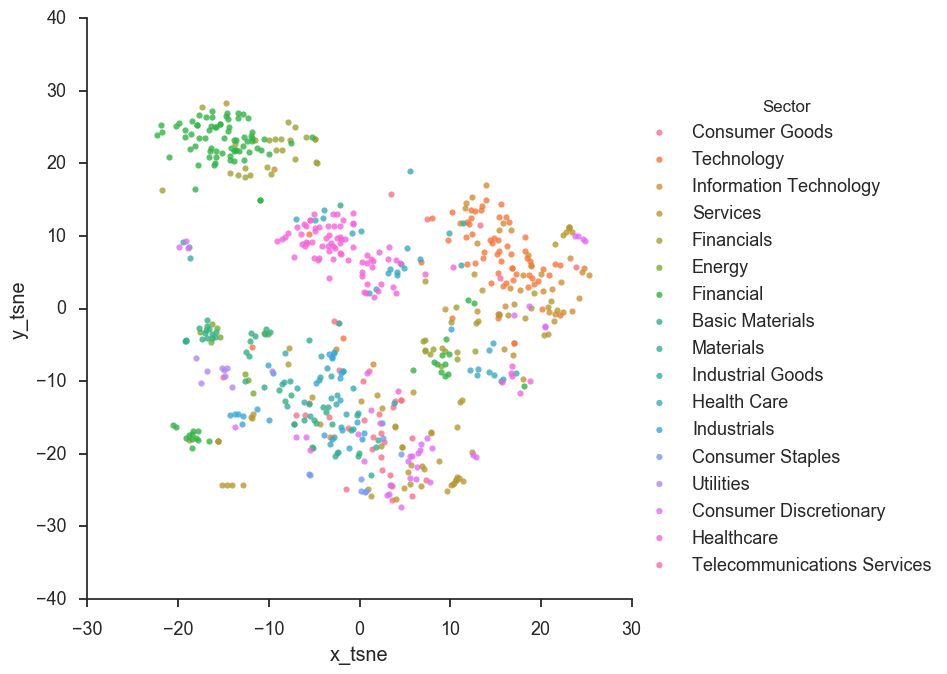

In [282]:
import seaborn as sns
sns.set(style="ticks", context="talk")

g = sns.lmplot(x="x_tsne", y="y_tsne", hue="Sector", data=new_graphing, size=7, fit_reg=False)


In [68]:
feature = x.iloc[ :,:200]
predict = x.iloc[:,201]
feature.shape

(627, 200)

In [101]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(feature)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [102]:
a=pca.fit_transform(feature)

In [103]:
a

array([[-0.30124694, -1.19318144],
       [ 4.4529236 , -2.13580318],
       [ 2.52841874, -2.85251907],
       ..., 
       [ 1.36087296,  4.97469222],
       [ 1.19788934, -4.33600985],
       [-5.71625801,  5.73791113]])

In [104]:
PC = pd.DataFrame(a)

In [287]:
PC = PC.reset_index(drop=True)

In [105]:
graphing = pd.concat([PC, predict],axis=1)

In [108]:
graphing.columns

Index([u'x', u'y', u'status'], dtype='object')

In [288]:
graphing = graphing.rename(index=str, columns={0: "x", 1: "y"})

In [292]:
graphing_total = pd.concat([graphing.reset_index(drop=True), new_graphing], axis = 1)

In [295]:
graphing_total.columns

Index([u'x', u'y', u'status', u'x_tsne', u'y_tsne', u'status', u'CIK #',
       u'Name', u'company', u'date', u'quarter', u'report', u'old', u'Ticker',
       u'Sector'],
      dtype='object')

In [296]:
graphing_total = graphing_total[["x","y","status","x_tsne","y_tsne","CIK #","Name","company","date","Ticker","Sector"]]

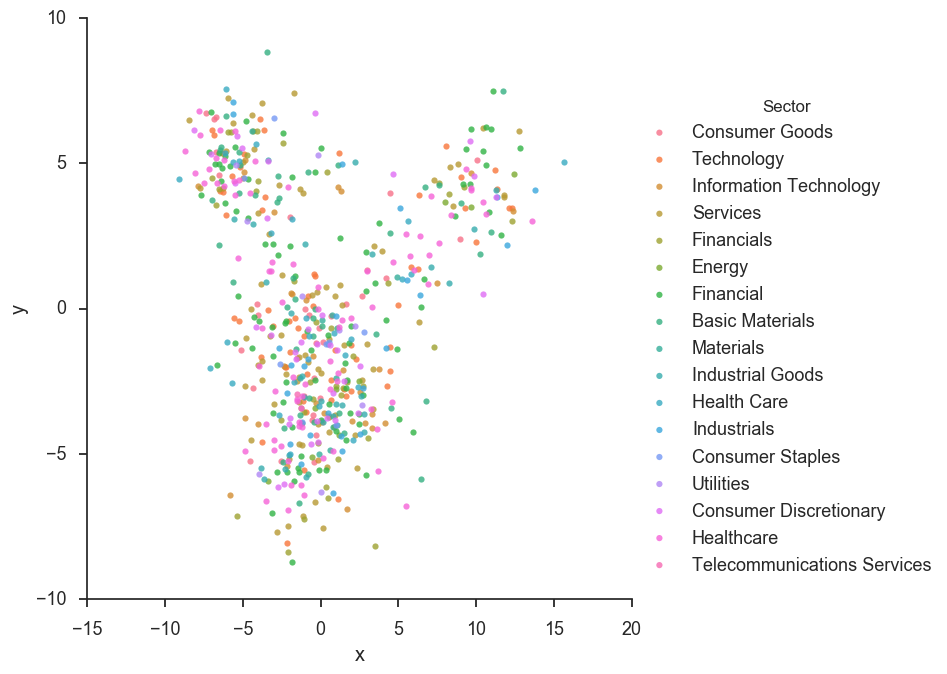

In [298]:
import seaborn as sns
sns.set(style="ticks", context="talk")

g = sns.lmplot(x="x", y="y", hue="Sector", data=graphing_total,size=7, fit_reg=False)



In [121]:
pca_data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,Name,status
0,0.119088,-1.167241,-0.913466,-1.399848,-0.238699,-0.131849,-0.780992,-0.462562,-0.751227,-0.141533,...,0.217325,0.71867,0.847708,-1.194475,0.736175,-1.4827,0.782401,-0.233067,acme united corp,winner


In [124]:
pca_new = pca_data.rename(index = str, columns={"0":"x","1":"y"})

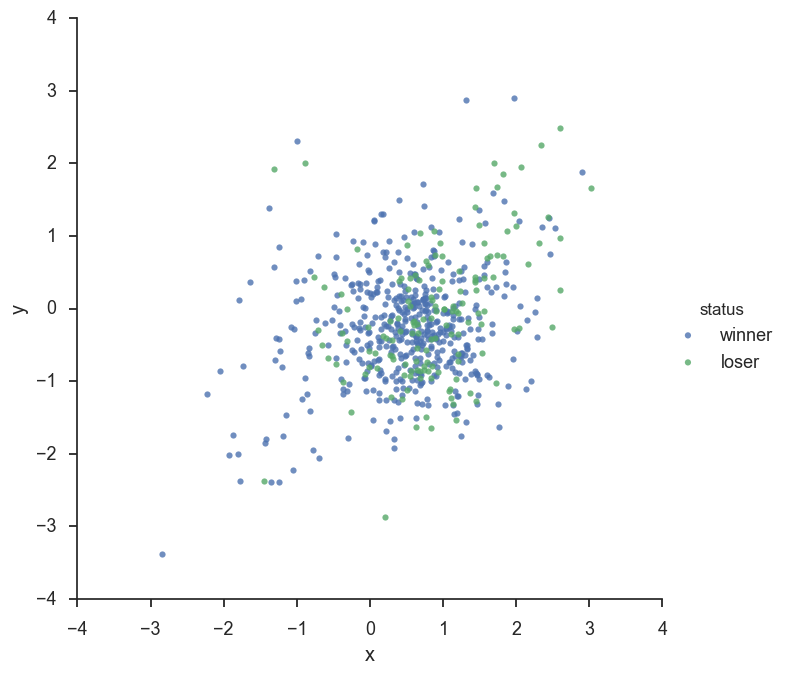

In [125]:
import seaborn as sns
sns.set(style="ticks", context="talk")

h = sns.lmplot(x="x", y="y", hue="status", data=pca_new, size=7, fit_reg=False)

# reclassifing sectors into smaller groups

In [299]:
graphing_total["Sector"].value_counts()

Financial                      98
Healthcare                     82
Services                       78
Technology                     64
Basic Materials                47
Financials                     41
Consumer Discretionary         37
Consumer Goods                 35
Information Technology         32
Industrial Goods               30
Industrials                    27
Health Care                    26
Energy                         10
Utilities                       9
Materials                       9
Consumer Staples                8
Telecommunications Services     1
Name: Sector, dtype: int64

In [300]:
graphing_total.loc[graphing_total["Sector"]=="Health Care","new_sector"] = "Healthcare"
graphing_total.loc[graphing_total["Sector"]=="Healthcare","new_sector"] = "Healthcare"
graphing_total.loc[graphing_total["Sector"]=="Information Technology","new_sector"] = "Tech"
graphing_total.loc[graphing_total["Sector"]=="Technology","new_sector"] = "Tech"
graphing_total.loc[graphing_total["Sector"]=="Financials","new_sector"] = "Finance"
graphing_total.loc[graphing_total["Sector"]=="Financial","new_sector"] = "Finance"
graphing_total.loc[graphing_total["Sector"]=="Industrial Goods","new_sector"] = "Industrials"
graphing_total.loc[graphing_total["Sector"]=="Industrials","new_sector"] = "Industrials"
graphing_total.loc[graphing_total["Sector"]=="Consumer Staples","new_sector"] = "Consumer Staples"
graphing_total.loc[graphing_total["Sector"]=="Consumer Goods","new_sector"] = "Consumer Goods"
graphing_total.loc[graphing_total["Sector"]=="Consumer Discretionary","new_sector"] = "Consumer Discretionary"
graphing_total.loc[graphing_total["Sector"]=="Services","new_sector"] = "Services"
graphing_total.loc[graphing_total["Sector"]=="Basic Materials","new_sector"] = "Materials"
graphing_total.loc[graphing_total["Sector"]=="Materials","new_sector"] = "Materials"
graphing_total.loc[graphing_total["Sector"]=="Energy","new_sector"] = "Energy"
graphing_total.loc[graphing_total["Sector"]=="Utilities","new_sector"] = "Utilities"
graphing_total.loc[graphing_total["Sector"]=="Telecommunications Services","new_sector"] = "Telecommunications Services"

# PCA graph

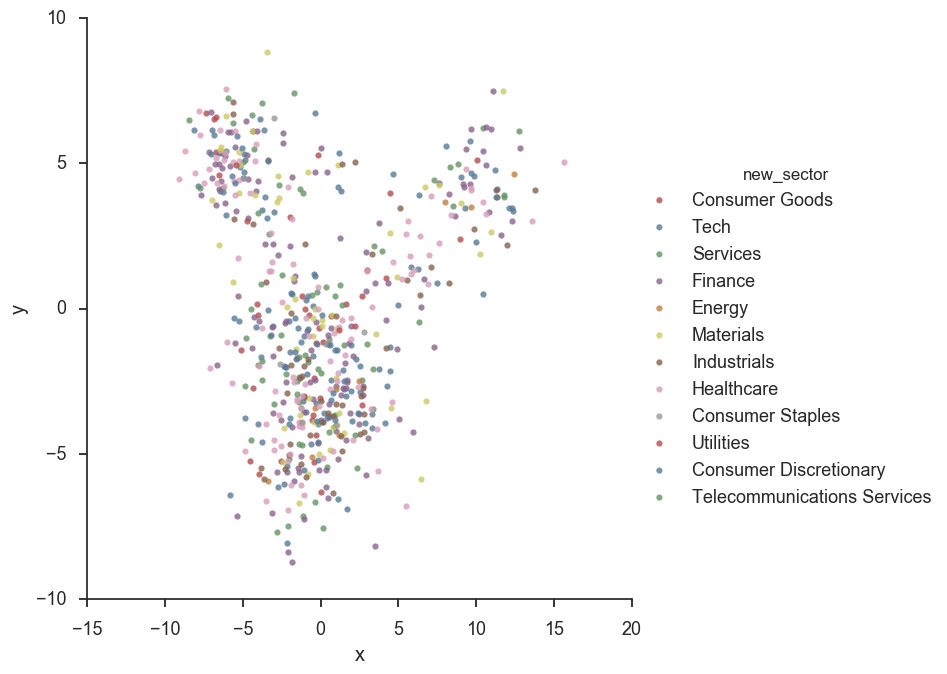

In [323]:
import seaborn as sns
current_palette_12 = sns.color_palette("Set1", n_colors=12, desat=.5)
sns.set(style="ticks", context="talk",palette=current_palette_12)

h = sns.lmplot(x="x", y="y", hue="new_sector", data=graphing_total, size=7, fit_reg=False)

In [314]:
graphing_total['Name'].head(2)

0              acme united corp
1    advanced micro devices inc
Name: Name, dtype: object

# graphing tsne

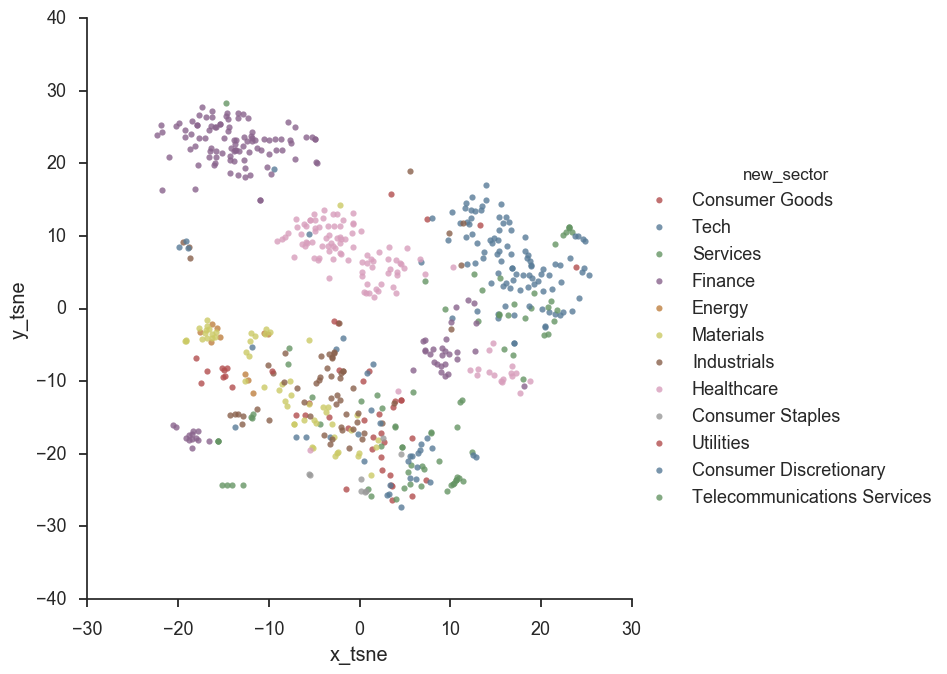

In [322]:
import seaborn as sns
current_palette_12 = sns.color_palette("Set1", n_colors=12, desat=.5)
sns.set(style="ticks", context="talk",palette=current_palette_12)

h = sns.lmplot(x="x_tsne", y="y_tsne", hue="new_sector", data=graphing_total, size=7, fit_reg=False)

#graphing_total[['x_tsne','y_tsne','Name']].apply(lambda x: h.annotate(*Name),axis=1);